In [1]:
import os
import pandas as pd

In [2]:
CLINICAL_DATA_DIR = "./thyroid_lynph_node_metastasis.xlsx"

In [3]:
o_df = pd.read_excel(CLINICAL_DATA_DIR, engine="openpyxl")
o_df.columns

Index(['병원명', '진단명', '부여번호', 'Surgical NO', '나이 (진단시)', '성별 (M/F)',
       '수술방법 (excision/lobectomy/total)', '수술연월일',
       '암의 위치 (Rt./Lt./isthmus/Both)', '암의 개수 (single/multiple)',
       '암 size (mm)_장경', 'Extrathyroid extension (No/Yes(micro)/Yes(gross) ',
       'T category',
       'Non-neoplastic parenchyma (Lymphocytic thyroiditis 여부, No/Yes)',
       'Thyroglobulin Ag level (ng/mL)', 'Anti-thyroglobulin Ab level (IU/mL)',
       'Anti-TPO Ab level (IU/mL)',
       '림프절 전이여부_수술당시 (No/ Yes(central or perithyroidal)/ Yes(neck)/ Yes(central+neck)',
       'Lateral neck LN dissection 여부_수술당시 (No/Yes)', '전이 림프절 개수_수술당시',
       'N category', 'AJCC stage (8판)', 'BRAF mutation (o:-; 1:+)',
       'Last F/U 날짜 (연-월-일)', 'Neck LN 재발 여부 (0: No/ 1: YES)',
       'Neck LN 재발 발견일 (연-월-일)',
       'Neck LN 재발 위치 (unilateral/bilateral/contralateral)',
       '수술부위 재발여부 (0: No/ 1: YES)', '수술부위 재발 발견일 (연-월-일)',
       '다른 장기로 전이 여부 (0: No/ 1: YES)', '다른 장기 위치', '다른 장기로 전이 발견일 (연-월-일)',
      

In [4]:
changed_colums = {
    '병원명': 'hospital',
    '진단명': 'diagnosis', '부여번호': 'serial', 
    '나이 (진단시)': 'age(on diagnosis)', '성별 (M/F)': 'sex(m/f)',
    '수술방법 (excision/lobectomy/total)': 'surgical method(excision/lobectomy/total)',
    '수술연월일': 'surgical date',
    '암의 위치 (Rt./Lt./isthmus/Both)': 'cancer loc(Rt./Lt./isthmus/Both)',
    '암의 개수 (single/multiple)': 'cancer count(single/multiple)',
    '암 size (mm)_장경': 'cancer size(mm)',
    'Non-neoplastic parenchyma (Lymphocytic thyroiditis 여부, No/Yes)': 'Non-neoplastic parenchyma',
    'Extrathyroid extension (No/Yes(micro)/Yes(gross) ': 'Extrathyroid extension (No/Yes(micro)/Yes(gross)',
    '림프절 전이여부_수술당시 (No/ Yes(central or perithyroidal)/ Yes(neck)/ Yes(central+neck)': 'lnm(no/yes(central or perithyroidal)/yes(neck)/yes(central+neck))',
    'Lateral neck LN dissection 여부_수술당시 (No/Yes)': 'Lateral neck LN dissection(No/Yes)',
    '전이 림프절 개수_수술당시': 'lnm count(on surgery)',
    'AJCC stage (8판)': 'ajcc stage(8th)',
    'Last F/U 날짜 (연-월-일)': 'last f/u(y-m-d)',
    'Neck LN 재발 여부 (0: No/ 1: YES)': 'neck lnm(0:n/1:y)',
    'Neck LN 재발 발견일 (연-월-일)': 'neck lnm date(y-m-d)',
    'Neck LN 재발 위치 (unilateral/bilateral/contralateral)': 'lnm loc(unilateral/bilateral/contralateral)',
    '수술부위 재발여부 (0: No/ 1: YES)': 'recur on surgical loc(0:n/1:y)',
    '수술부위 재발 발견일 (연-월-일)': 'recur date on surgical loc(y-m-d)',
    '다른 장기로 전이 여부 (0: No/ 1: YES)': 'recur other organ(0:n/1:y)',
    '다른 장기 위치': 'loc of recur other organ',
    '다른 장기로 전이 발견일 (연-월-일)': 'date of recur other organ',
    '(처음 수술 후) 남아있는 thyroid 조직에 새로운 PTC 생기는것 여부 (0: No/ 1: YES)': 'ptc on remaining(0:n/1:y)',
    '남아있는 thyroid 조직에 새로운 PTC 발견일 (연-월-일)': 'date of ptc on remaining',
    '이 질병으로 사망여부 (0:생존/ 1:사망/ 2:다른이유로사망/ 3:f/u loss)': 'death by the diagnosis',
    '사망일 (연-월-일)': 'death date',
    '비고': 'other'
}
o_df.rename(columns = changed_colums,inplace=True)
o_df.columns

Index(['hospital', 'diagnosis', 'serial', 'Surgical NO', 'age(on diagnosis)',
       'sex(m/f)', 'surgical method(excision/lobectomy/total)',
       'surgical date', 'cancer loc(Rt./Lt./isthmus/Both)',
       'cancer count(single/multiple)', 'cancer size(mm)',
       'Extrathyroid extension (No/Yes(micro)/Yes(gross)', 'T category',
       'Non-neoplastic parenchyma', 'Thyroglobulin Ag level (ng/mL)',
       'Anti-thyroglobulin Ab level (IU/mL)', 'Anti-TPO Ab level (IU/mL)',
       'lnm(no/yes(central or perithyroidal)/yes(neck)/yes(central+neck))',
       'Lateral neck LN dissection(No/Yes)', 'lnm count(on surgery)',
       'N category', 'ajcc stage(8th)', 'BRAF mutation (o:-; 1:+)',
       'last f/u(y-m-d)', 'neck lnm(0:n/1:y)', 'neck lnm date(y-m-d)',
       'lnm loc(unilateral/bilateral/contralateral)',
       'recur on surgical loc(0:n/1:y)', 'recur date on surgical loc(y-m-d)',
       'recur other organ(0:n/1:y)', 'loc of recur other organ',
       'date of recur other organ', 'pt

In [5]:
o_df.shape

(500, 37)

In [268]:
o_df['last f/u(y-m-d)'].value_counts()

2021-09-14    7
2021-09-01    6
2021-08-11    6
2021-09-09    5
2021-11-08    5
             ..
2018-04-17    1
2021-02-09    1
2020-03-27    1
2021-06-04    1
2019-10-29    1
Name: last f/u(y-m-d), Length: 325, dtype: int64

In [259]:
df = o_df.drop(['hospital',  'serial', 'Surgical NO', 'surgical method(excision/lobectomy/total)', 
    'T category', 'N category', 'ajcc stage(8th)', 
    'neck lnm date(y-m-d)', 
    'lnm loc(unilateral/bilateral/contralateral)', 'recur on surgical loc(0:n/1:y)', 
    'recur date on surgical loc(y-m-d)', 
    'loc of recur other organ', 'date of recur other organ', 'ptc on remaining(0:n/1:y)', 
    'date of ptc on remaining', 'death date', 'other',
    'surgical date', 'last f/u(y-m-d)'], axis=1)
type(df)

pandas.core.frame.DataFrame

In [261]:
# Encoding

## Sex -> 0: M, 1: F
df.loc[df["sex(m/f)"] == "M", "sex(m/f)"] = 0
df.loc[df["sex(m/f)"] == "F", "sex(m/f)"] = 1
df["sex(m/f)"] = pd.to_numeric(df["sex(m/f)"])
## cancer loc(Rt./Lt./isthmus/Both) -> 0: Rt., 1: Lt. 2: isthmus 3: Both
df.loc[df["cancer loc(Rt./Lt./isthmus/Both)"] == "Rt.", "cancer loc(Rt./Lt./isthmus/Both)"]     = 0
df.loc[df["cancer loc(Rt./Lt./isthmus/Both)"] == "Lt.", "cancer loc(Rt./Lt./isthmus/Both)"]     = 1
df.loc[df["cancer loc(Rt./Lt./isthmus/Both)"] == "isthmus", "cancer loc(Rt./Lt./isthmus/Both)"] = 2
df.loc[df["cancer loc(Rt./Lt./isthmus/Both)"] == "Isthmus and Right", "cancer loc(Rt./Lt./isthmus/Both)"] = 2
df.loc[df["cancer loc(Rt./Lt./isthmus/Both)"] == "Isthmus and Both", "cancer loc(Rt./Lt./isthmus/Both)"] = 2
df.loc[df["cancer loc(Rt./Lt./isthmus/Both)"] == "Isthmus and Left", "cancer loc(Rt./Lt./isthmus/Both)"] = 2
df.loc[df["cancer loc(Rt./Lt./isthmus/Both)"] == "Both", "cancer loc(Rt./Lt./isthmus/Both)"]    = 3
df["cancer loc(Rt./Lt./isthmus/Both)"] = pd.to_numeric(df["cancer loc(Rt./Lt./isthmus/Both)"])
## cancer count(single/multiple) -> 0: single, 1: multiple
df.loc[df["cancer count(single/multiple)"] == "single", "cancer count(single/multiple)"]   = 0
df.loc[df["cancer count(single/multiple)"] == "multiple", "cancer count(single/multiple)"] = 1
df["cancer count(single/multiple)"] = pd.to_numeric(df["cancer count(single/multiple)"])
## Extrathyroid extension (No/Yes(micro)/Yes(gross) -> 0: No, 1: Yes(micro), 2: Yes(gross)
df.loc[df["Extrathyroid extension (No/Yes(micro)/Yes(gross)"] == "No",         "Extrathyroid extension (No/Yes(micro)/Yes(gross)"] = 0
df.loc[df["Extrathyroid extension (No/Yes(micro)/Yes(gross)"] == "Yes(micro)", "Extrathyroid extension (No/Yes(micro)/Yes(gross)"] = 1
df.loc[df["Extrathyroid extension (No/Yes(micro)/Yes(gross)"] == "Yes(gross)", "Extrathyroid extension (No/Yes(micro)/Yes(gross)"] = 2
df["Extrathyroid extension (No/Yes(micro)/Yes(gross)"] = pd.to_numeric(df["Extrathyroid extension (No/Yes(micro)/Yes(gross)"])
## Non-neoplastic parenchyma -> 0: No, 1: Yes
df.loc[df["Non-neoplastic parenchyma"] == "No",  "Non-neoplastic parenchyma"] = 0
df.loc[df["Non-neoplastic parenchyma"] == "Yes", "Non-neoplastic parenchyma"] = 1
df["Non-neoplastic parenchyma"] = pd.to_numeric(df["Non-neoplastic parenchyma"])
## lnm(no/yes(central or perithyroidal)/yes(neck)/yes(central+neck)) -> 0: no, 1: yes(central or perithyroidal), 2: yes(neck), 3: yes(central+neck)
## lnm(no/yes(central or perithyroidal)/yes(neck)/yes(central+neck)) -> 0: no, 1: yes(central or perithyroidal), 1: yes(neck), 1: yes(central+neck)
df.loc[df["lnm(no/yes(central or perithyroidal)/yes(neck)/yes(central+neck))"] == "No", "lnm(no/yes(central or perithyroidal)/yes(neck)/yes(central+neck))"] = 0
df.loc[df["lnm(no/yes(central or perithyroidal)/yes(neck)/yes(central+neck))"] == "Yes(central or perithyroidal)", "lnm(no/yes(central or perithyroidal)/yes(neck)/yes(central+neck))"] = 1
df.loc[df["lnm(no/yes(central or perithyroidal)/yes(neck)/yes(central+neck))"] == "Yes(neck)", "lnm(no/yes(central or perithyroidal)/yes(neck)/yes(central+neck))"] = 1
df.loc[df["lnm(no/yes(central or perithyroidal)/yes(neck)/yes(central+neck))"] == "Yes(central+neck)", "lnm(no/yes(central or perithyroidal)/yes(neck)/yes(central+neck))"] = 1
df["lnm(no/yes(central or perithyroidal)/yes(neck)/yes(central+neck))"] = pd.to_numeric(df["lnm(no/yes(central or perithyroidal)/yes(neck)/yes(central+neck))"])
## Lateral neck LN dissection(No/Yes) -> 0: no, 1: yes
df.loc[df["Lateral neck LN dissection(No/Yes)"] == "No", "Lateral neck LN dissection(No/Yes)"] = 0
df.loc[df["Lateral neck LN dissection(No/Yes)"] == "Yes", "Lateral neck LN dissection(No/Yes)"] = 1
df["Lateral neck LN dissection(No/Yes)"] = pd.to_numeric(df["Lateral neck LN dissection(No/Yes)"])

df.head()

,diagnosis,age(on diagnosis),sex(m/f),cancer loc(Rt./Lt./isthmus/Both),cancer count(single/multiple),cancer size(mm),Extrathyroid extension (No/Yes(micro)/Yes(gross),Non-neoplastic parenchyma,Thyroglobulin Ag level (ng/mL),Anti-thyroglobulin Ab level (IU/mL),Anti-TPO Ab level (IU/mL),lnm(no/yes(central or perithyroidal)/yes(neck)/yes(central+neck)),Lateral neck LN dissection(No/Yes),lnm count(on surgery),BRAF mutation (o:-; 1:+),neck lnm(0:n/1:y),recur other organ(0:n/1:y),death by the diagnosis
0,2,50,0,3,1,8,0,1,13.0,13.4,261.5,1,0,1,1,0,0,0
1,1,28,1,1,0,7,0,1,1.0,423.3,10.0,1,0,5,1,0,0,0
2,1,38,1,1,1,7,0,0,6.3,12.1,5.4,1,0,1,1,0,0,0
3,1,50,0,3,1,5,0,1,0.1,39.3,11.9,0,0,0,1,0,0,0
4,1,40,1,0,1,3,0,1,5.1,204.8,6.6,0,0,0,1,0,0,0


In [262]:
df.dropna(inplace=True)
df.shape

(498, 18)

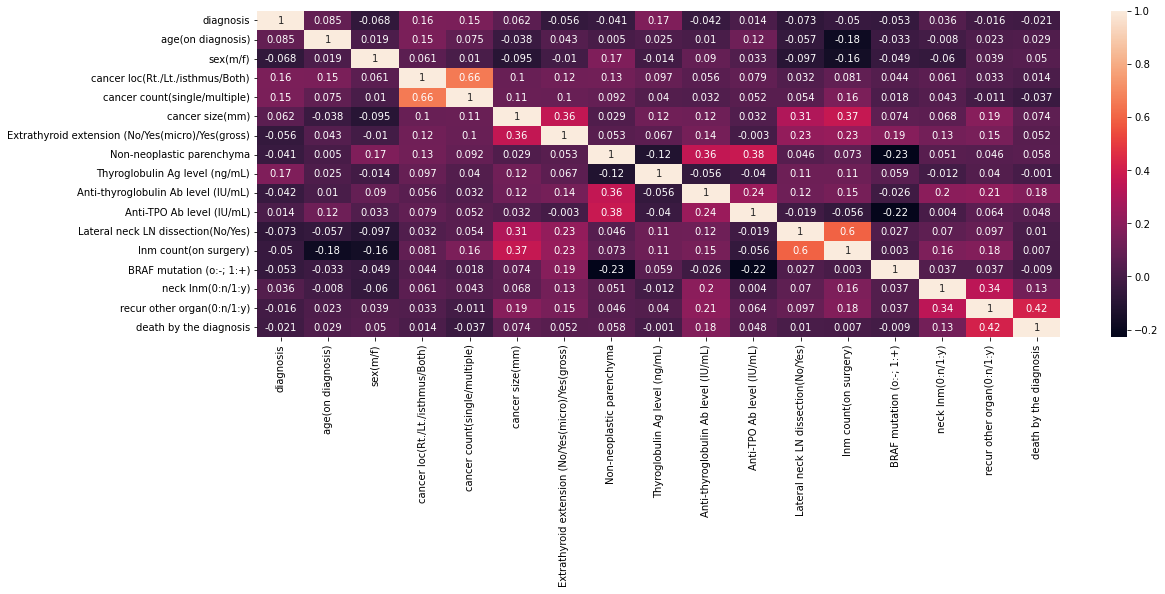

In [263]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Visualizing a Pandas Correlation Matrix Using Seaborn
corr_dropped = df.drop(['lnm(no/yes(central or perithyroidal)/yes(neck)/yes(central+neck))'], axis=1)
matrix = corr_dropped.corr().round(3)

fig, ax = plt.subplots(figsize=(18, 6))         # Sample figsize in inches
sns.heatmap(matrix, annot=True, ax=ax)
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   diagnosis                                                          498 non-null    int64  
 1   age(on diagnosis)                                                  498 non-null    int64  
 2   sex(m/f)                                                           498 non-null    int64  
 3   cancer loc(Rt./Lt./isthmus/Both)                                   498 non-null    int64  
 4   cancer count(single/multiple)                                      498 non-null    int64  
 5   cancer size(mm)                                                    498 non-null    int64  
 6   Extrathyroid extension (No/Yes(micro)/Yes(gross)                   498 non-null    int64  
 7   Non-neoplastic parenchyma 

In [238]:
COLUMNS = {
 0 : 'diagnosis',
 1 : 'age(on diagnosis)',
 2 : 'sex(m/f)',
 3 : 'cancer loc(Rt./Lt./isthmus/Both)',
 4 : 'cancer count(single/multiple)',
 5 : 'cancer size(mm)',
 6 : 'Extrathyroid extension (No/Yes(micro)/Yes(gross)',
 7 : 'Non-neoplastic parenchyma',
 8 : 'Thyroglobulin Ag level (ng/mL)',
 9 : 'Anti-thyroglobulin Ab level (IU/mL)',
 10: 'Anti-TPO Ab level (IU/mL)',
 11: 'lnm(no/yes(central or perithyroidal)/yes(neck)/yes(central+neck))',
 12: 'Lateral neck LN dissection(No/Yes)',
 13: 'lnm count(on surgery)',
 14: 'BRAF mutation (o:-; 1:+)',
 15: 'neck lnm(0:n/1:y)',
 16: 'recur other organ(0:n/1:y)',
 17: 'death by the diagnosis',
}

In [244]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
print(len(train), len(test))

selects = []
for i in [ 1, 2, 4, 5, 6, 8, 9, 10 ]:
    selects.append(COLUMNS[i])

# X_train = train.drop(['lnm(no/yes(central or perithyroidal)/yes(neck)/yes(central+neck))'], axis=1)
X_train = train[selects]
y_train = train['lnm(no/yes(central or perithyroidal)/yes(neck)/yes(central+neck))']
# X_test = test.drop(['lnm(no/yes(central or perithyroidal)/yes(neck)/yes(central+neck))'], axis=1)
X_test = test[selects]
y_test = test['lnm(no/yes(central or perithyroidal)/yes(neck)/yes(central+neck))']

print(f'Train. X: {len(X_train)}, Y: {len(y_train)}')
print(f'Test. X: {len(X_test)}, Y: {len(y_test)}')

398 100
Train. X: 398, Y: 398
Test. X: 100, Y: 100


In [249]:
import xgboost
model = xgboost.XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

[14:50:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=40,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [250]:
y_pred = model.predict(X_test)

In [251]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
( tn, fp, fn, tp )

(35, 18, 16, 31)

In [252]:
from sklearn.metrics import f1_score
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print('macro: {}, micro: {}, wieghted: {}'.format(f1_macro, f1_micro, f1_weighted))

macro: 0.6594551282051282, micro: 0.66, wieghted: 0.6602724358974359


[ 1, 2, 4, 5, 6, 8, 9, 10 ]
macro: 0.6598639455782312, micro: 0.66, wieghted: 0.6602721088435374
macro: 0.6989160979526294, micro: 0.7, wieghted: 0.6992773986350863


## Two factors

### Anti-thyroglobulin Ab level (IU/mL), Anti-TPO Ab level (IU/mL)
macro: 0.6398559423769508, micro: 0.64, wieghted: 0.6395678271308524

### Thyroglobulin Ag level (ng/mL), Anti-TPO Ab level (IU/mL)
macro: 0.52, micro: 0.55, wieghted: 0.544

### Thyroglobulin Ag level (ng/mL), Anti-thyroglobulin Ab level (IU/mL)
macro: 0.4949494949494949, micro: 0.5, wieghted: 0.498989898989899

### cancer count(single/multiple), cancer size(mm)
macro: 0.5, micro: 0.52, wieghted: 0.5

### diagnosis, sex(m/f)
macro: 0.625, micro: 0.64, wieghted: 0.622

### cancer count(single/multiple), sex(m/f)
macro: 0.629666700030027, micro: 0.63, wieghted: 0.629666700030027

## Three factors

### Thyroglobulin Ag level (ng/mL), Anti-thyroglobulin Ab level (IU/mL), Anti-TPO Ab level (IU/mL)
macro: 0.42020140372291725, micro: 0.42999999999999994, wieghted: 0.4277387854745194

# Result (F1-Score)


## A factor


### diagnosis
macro: 0.35064935064935066, micro: 0.54, wieghted: 0.3787012987012987

### age
macro: 0.5696126513862476, micro: 0.57, wieghted: 0.5672885597037335

### sex(m/f)
macro: 0.48684354187138335, micro: 0.53, wieghted: 0.4898198493285294

### cancer loc(Rt./Lt./isthmus/Both)
macro: 0.43253467843631777, micro: 0.46, wieghted: 0.435031525851198

### cancer count(single/multiple)
macro: 0.5953937130407718, micro: 0.61, wieghted: 0.6061562402738874

### cancer size(mm)
macro: 0.586606035551881, micro: 0.6, wieghted: 0.580653162463828

### Extrathyroid extension (No/Yes(micro)/Yes(gross)
macro: 0.5696126513862476, micro: 0.57, wieghted: 0.5709038134320888

### Non-neoplastic parenchyma
macro: 0.36708860759493667, micro: 0.58, wieghted: 0.42582278481012653

### Thyroglobulin Ag level (ng/mL)
macro: 0.49000407996736023, micro: 0.5, wieghted: 0.5128518971848225

### Anti-TPO Ab level (IU/mL)
macro: 0.5495946351716545, micro: 0.55, wieghted: 0.5506756080472425

### Lateral neck LN dissection(No/Yes)
macro: 0.5951417004048583, micro: 0.67, wieghted: 0.6160323886639675

### BRAF mutation (o:-; 1:+)
macro: 0.3333333333333333, micro: 0.5, wieghted: 0.33333333333333326

### recur other organ(0:n/1:y)
macro: 0.33774834437086093, micro: 0.51, wieghted: 0.34450331125827816